In [1]:
import numpy as np
import math as m
from sympy import *
from scipy.integrate import solve_ivp # solving differential equations
import matplotlib.pyplot as plt # ploting results
import matplotlib.tri as tlt
mat = np.array

x ,y = symbols('x y')

In [2]:
def slope_yIntercept(point_1,point_2):
    """"Returns the slope and the y-intercept"""
    if point_1[1] == point_2[1]:
        return ['a',point_1[1]]
    elif point_1[0] == point_2[0]:
        return ['b',point_1[0]]
    else:
        m = (point_1[1]-point_2[1])/(point_1[0]-point_2[0])
        c = point_2[1] - m* point_2[0]
        return[-m,-c]


In [3]:
def distance_line(slope_yIntercept,position_robot):
    """Returns the distance between a point-like-robot and a line"""
    if slope_yIntercept[0] == 'a':
        return abs(slope_yIntercept[1]-position_robot[1])
    elif slope_yIntercept[0] == 'b':
        return abs(slope_yIntercept[1]-position_robot[0])
    else:
        return (abs(position_robot[1]+slope_yIntercept[0]*position_robot[0]+slope_yIntercept[1]))/(np.sqrt(1+slope_yIntercept[0]**2))



In [4]:
def distance_point(point_1,point_2):
    """Returns the distance between two points"""
    distance = np.sqrt((point_1[0]-point_2[0])**2+(point_1[1]-point_2[1])**2)
    return distance    


In [5]:
def triangle_vertices(point_1,point_2,point_3,point_4):
    """Return the poisition of the triangle vertices"""
    distance_1 = distance_point(point_4,point_1)
    distance_2 = distance_point(point_4,point_2)
    distance_3 = distance_point(point_4,point_3)
    a = [distance_1,distance_2,distance_3]
    a.remove(max(a))
    if a == [distance_1,distance_2] or a ==[distance_2,distance_1]:
        if point_1[0]>=point_2[0]:
            return [point_1,point_2,point_3]
        else:
            return [point_2,point_1,point_3]
    elif a== [distance_1,distance_3] or a== [distance_3,distance_1]:
        if point_1[0]>=point_3[0]:
            return[point_1,point_3,point_2]
        else:
            return[point_3,point_1,point_2]
    
    else:
        if point_2[0]>=point_3[0]:
            return [point_2,point_3,point_1]
        else:
            return[point_3,point_2,point_1]


In [6]:
def weight_1(distance_1,distance_2,distance_exit):
    """Returns the weight applied to the 1st vector"""
    w_1=(distance_2*distance_exit)/((distance_2*distance_exit)+distance_1)
    return w_1



In [7]:
def weight_2(distance_1,distance_2,distance_exit):
    """Returns the weight applied to the 2nd vector""" 
    w_2 = (distance_1*distance_exit)/((distance_1*distance_exit)+distance_2)
    return w_2

In [8]:
def weight_x(distance_1,distance_2,distance_exit):
    """Returns the weight applied to the exit face vector"""
    w_x = (distance_2*distance_1)/((distance_2*distance_1)+distance_exit)
    return w_x


In [9]:
def vector_sign(vertex_1,vertex_2,vertex_3,theta_exit,theta_edge_1):
    """Return the sign of the vectors"""
    if theta_exit == 0:
        theta_exit = -0.1
    elif theta_exit == np.pi/2:
        theta_exit = theta_exit-0.1
    
    if theta_exit<0:
        if vertex_1[0]>vertex_3[0] and vertex_3[0]>=vertex_2[0] and vertex_2[1]>vertex_3[1]:
            return[1,1,1]
        elif vertex_1[0]>vertex_3[0] and vertex_3[0]<vertex_2[0] and vertex_2[1]>=vertex_3[1]:
            return[1,1,-1]
        elif vertex_1[0]>vertex_3[0] and vertex_3[0]<vertex_2[0] and vertex_2[1]<vertex_3[1] and abs(theta_edge_1)<abs(theta_exit):
            return [1,1,-1]
        elif vertex_1[0]>vertex_3[0] and vertex_3[0]<vertex_2[0] and vertex_2[1]<vertex_3[1] and abs(theta_edge_1)>abs(theta_exit):
            return [-1,-1,1]
        elif vertex_1[0]>vertex_3[0] and vertex_2[0]<vertex_3[0] and vertex_1[1]<vertex_3[1]:
            return [-1,-1,-1]
        elif vertex_1[0]<=vertex_3[0] and vertex_2[0]<vertex_3[0] and vertex_1[1]<vertex_3[1]:
            return [-1,+1,-1]
        elif vertex_1[0]<vertex_3[0] and vertex_2[0]<vertex_3[0] and vertex_1[1]>vertex_3[1] and abs(theta_edge_1)>abs(theta_exit):
            return [-1,+1,-1]
        elif vertex_1[0]<vertex_3[0] and vertex_2[0]<vertex_3[0] and vertex_1[1]>vertex_3[1] and abs(theta_edge_1)<abs(theta_exit):
            return [+1,-1,+1]
        else:
            return[1,1,1]
        
        
    if theta_exit > 0:
        if vertex_1[0]>=vertex_3[0] and vertex_2[0]<=vertex_3[0] and vertex_1[1]>vertex_3[1]:
            return [1,1,1]
        elif vertex_1[0]<vertex_3[0] and vertex_2[0]<vertex_3[0] and vertex_1[1]>=vertex_3[1]:
            return [1,-1,1]
        elif vertex_1[0]<vertex_3[0] and vertex_2[0]<vertex_3[0] and vertex_1[1]<vertex_3[1] and theta_exit>theta_edge_1:
            return [1,-1,1]
        elif vertex_1[0]<vertex_3[0] and vertex_2[0]<vertex_3[0] and vertex_1[1]<vertex_3[1] and theta_exit<theta_edge_1:
            return [-1,1,-1]
        elif vertex_1[0]> vertex_3[0] and vertex_2[0]<=vertex_3[0] and vertex_2[1]<vertex_3[1]:
            return [-1,-1,-1]
        elif vertex_1[0]>vertex_3[0] and vertex_2[0]>vertex_3[0]and vertex_2[1]<=vertex_3[1]:
            return [-1,-1,1]
        elif vertex_1[0]>vertex_3[0]and vertex_2[0]>vertex_3[0] and vertex_2[1]>vertex_3[1] and theta_exit>theta_edge_1:
            return [-1,-1,1]
        elif vertex_1[0]>vertex_3[0]and vertex_2[0]>vertex_3[0] and vertex_2[1]>vertex_3[1] and theta_exit<theta_edge_1:
            return [1,1,-1]
        else:
            return[-1,-1,-1]


In [10]:
def angle(point_1,point_2):
    """Returns the angle of the line formed by the given 2 points""" 
    if ((point_1[0]-point_2[0]) == 0):
        return np.pi/2
    else:
        return np.arctan((point_1[1]-point_2[1])/(point_1[0]-point_2[0]))


In [11]:
def plot_fig(PointsList,points_x,points_y):
     
    """Display the set of intersecting triangles """ 
    plt.figure()
    for i in range(len(PointsList)):
        Line_1_x = [PointsList[i][0][0],PointsList[i][1][0]]
        Line_1_y = [PointsList[i][0][1],PointsList[i][1][1]]
        Line_2_x = [PointsList[i][0][0],PointsList[i][2][0]]
        Line_2_y = [PointsList[i][0][1],PointsList[i][2][1]]
        Line_3_x = [PointsList[i][1][0],PointsList[i][2][0]]
        Line_3_y = [PointsList[i][1][1],PointsList[i][2][1]]
        plt.plot(Line_1_x,Line_1_y)
        plt.plot(Line_2_x,Line_2_y)
        plt.plot(Line_3_x,Line_3_y)
    plt.plot(points_x, points_y, label='Position')


In [12]:
point_1 = [1,1]
point_2 = [3,3]
point_3 = [5,1]
point_4 = [6,4]
point_5 = [4,6]
point_6 = [9,8]
point_7 = [11,4]
point_8 = [13,8]
point_9 = [15,4]
point_10 = [17,8]
point_11 = [14,10]
point_12= [20,9]

points = [point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12]



i=0
triangle_edges = []
change_x= []
change_y =[]
position_robot = [2.5,2]
change_x = [position_robot[0]]
change_y = [position_robot[1]]

for i in range(len(points)-2):
    
    if i<len(points)-3:
        tri= triangle_vertices(points[i],points[i+1],points[i+2],points[i+3])
        if i == 0:
            pass
        else:
            tri = triangle_vertices(tri_old[0],tri_old[1], points [i+2], points [i+3])
            
    
        triangle_edges.append(tri)

        angle_1 = angle(tri[0],tri[2])
        angle_x = angle(tri[0],tri[1])
        angle_2 = angle(tri[1],tri[2])
        eq_1 = slope_yIntercept(tri[0],tri[2])
        eq_x = slope_yIntercept(tri[0],tri[1])
        eq_2 = slope_yIntercept(tri[1],tri[2])

        f_s = vector_sign(tri[0],tri[1],tri[2],angle_x,angle_1)


        f_1 = (np.cos(angle_1+f_s[1]*(np.pi/2))*x + np.sin(angle_1+f_s[1]*(np.pi/2))*y)
        f_2 = np.cos(angle_2+f_s[2]*(np.pi/2))*x + np.sin(angle_2+f_s[2]*(np.pi/2))*y
        f_x = np.cos(angle_x+f_s[0]*(np.pi/2))*x + np.sin(angle_x+f_s[0]*(np.pi/2))*y
        d_x = 4

        while not 1>=d_x>=0:
            d_1 = round(distance_line(eq_1,position_robot),4)
            d_x = round(distance_line(eq_x, position_robot),4)
            d_2 = round(distance_line(eq_2, position_robot),4)

            w_1 = weight_1(d_1,d_2,d_x)
            w_2 = weight_2(d_1,d_2,d_x)
            w_x = weight_x(d_1,d_2,d_x)  


            h = w_1* f_1 +w_2*f_2 +w_x*f_x 
            h_num = lambdify((x,y),h)

            h_num_x = h_num (position_robot [0],0)
            h_num_y = h_num (0, position_robot [1])
            position_robot[0]=position_robot[0]+h_num_x*0.1
            position_robot[1]=position_robot[1]+h_num_y*0.1
            change_x.append(position_robot[0])
            change_y.append(position_robot[1])
        tri_old = tri
    else:
        m = [points[i+2][0]+5,points[i+2][1]+5]
        tri = triangle_vertices(points[i],points[i+1],points[i+2],m)
        triangle_edges.append(tri)
        angle_1 = angle(tri[0],tri[2])
        angle_x = angle(tri[0],tri[1])
        angle_2 = angle(tri[1],tri[2])
        eq_1 = slope_yIntercept(tri[0],tri[2])
        eq_x = slope_yIntercept(tri[0],tri[1])
        eq_2 = slope_yIntercept(tri[1],tri[2])

        f_s = vector_sign(tri[0],tri[1],tri[2],angle_x,angle_1)


        f_1 = (np.cos(angle_1+f_s[1]*(np.pi/2))*x + np.sin(angle_1+f_s[1]*(np.pi/2))*y)
        f_2 = np.cos(angle_2+f_s[2]*(np.pi/2))*x + np.sin(angle_2+f_s[2]*(np.pi/2))*y
        f_x = np.cos(angle_x+f_s[0]*(np.pi/2))*x + np.sin(angle_x+f_s[0]*(np.pi/2))*y

        for b in range(20):
            d_1 = round(distance_line(eq_1,position_robot),4)
            d_x = round(distance_line(eq_x,position_robot),4)
            d_2 = round(distance_line(eq_2,position_robot),4)

            w_1 = weight_1(d_1,d_2,d_x)
            w_2 = weight_2(d_1,d_2,d_x)
            w_x = weight_x(d_1,d_2,d_x)  


            h = w_1* f_1 +w_2*f_2 -w_x*f_x 
            h_num= lambdify((x,y),h)

            h_num_x = h_num(position_robot[0],0)
            h_num_y = h_num(0,position_robot[1])
            position_robot[0]= position_robot[0]+h_num_x *0.1
            position_robot[1]= position_robot [1]+h_num_y *0.1
            change_x.append(position_robot[0])
            change_y.append(position_robot[1])


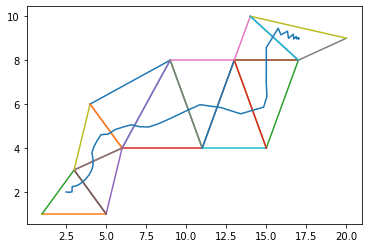

In [13]:
plot_fig(triangle_edges,change_x,change_y)


In [14]:
def get_h(i,position_robot,h_old):
    
    global tri_old
    point_1 = [1,1]
    point_2 = [3,3]
    point_3 = [5,1]
    point_4= [6,4]
    point_5 = [4,6]
    point_6 = [9,8]
    point_7 = [11,4]
    point_8 = [13,8]
    point_9 = [15,4]
    point_10 = [17,8]
    point_11 = [14,10]
    point_12= [20,9]


    points = [point_1,point_2,point_3,point_4,point_5,point_6,point_7,point_8,point_9,point_10,point_11,point_12]
    
    if i<len(points)-3:
            
           
            if i == 0:
                tri= triangle_vertices(points[i],points[i+1],points[i+2],points[i+3])
            else:
                tri = triangle_vertices(tri_old[0],tri_old[1],points[i+2],points[i+3])
            
    
        
            angle_1 = angle(tri[0],tri[2])
            angle_x = angle(tri[0],tri[1])
            angle_2 = angle(tri[1],tri[2])
            
            eq_1 = slope_yIntercept(tri[0],tri[2])
            eq_x = slope_yIntercept(tri[0],tri[1])
            eq_2 = slope_yIntercept(tri[1],tri[2])

            f_s = vector_sign(tri[0],tri[1],tri[2],angle_x,angle_1)


            f_1 = (np.cos(angle_1+f_s[1]*(np.pi/2))*x + np.sin(angle_1+f_s[1]*(np.pi/2))*y)
            f_2 = np.cos(angle_2+f_s[2]*(np.pi/2))*x + np.sin(angle_2+f_s[2]*(np.pi/2))*y
            f_x = np.cos(angle_x+f_s[0]*(np.pi/2))*x + np.sin(angle_x+f_s[0]*(np.pi/2))*y

            distance_cond = round(distance_line(eq_x,position_robot),4)
            
            
            if not 0.3>=distance_cond>=0:
                
                d_1 = round(distance_line(eq_1,position_robot),4)
                d_x = round(distance_line(eq_x,position_robot),4)
                d_2 = round(distance_line(eq_2,position_robot),4)

                w_1 = weight_1(d_1,d_2,d_x)
                w_2 = weight_2(d_1,d_2,d_x)
                w_x = weight_x(d_1,d_2,d_x)  


                h = w_1* f_1 +w_2*f_2 + w_x*f_x
                

                
                return [h,i]
                
                

            else:
                
                i+=1
                tri_old = tri

                return [h_old,i]

    else:
        m = [points[i+2][0]+5,points[i+2][1]+5]
        tri = triangle_vertices(points[i],points[i+1],points[i+2],m)
        

        angle_1 = angle(tri[0],tri[2])
        angle_x = angle(tri[0],tri[1])
        angle_2 = angle(tri[1],tri[2])
        
        eq_1 = slope_yIntercept(tri[0],tri[2])
        eq_x = slope_yIntercept(tri[0],tri[1])
        eq_2 = slope_yIntercept(tri[1],tri[2])

        f_s = vector_sign(tri[0],tri[1],tri[2],angle_x,angle_1)
        
        f_1 = (np.cos(angle_1+f_s[1]*(np.pi/2))*x + np.sin(angle_1+f_s[1]*(np.pi/2))*y)
        f_2 = np.cos(angle_2+f_s[2]*(np.pi/2))*x + np.sin(angle_2+f_s[2]*(np.pi/2))*y
        f_x = np.cos(angle_x+f_s[0]*(np.pi/2))*x + np.sin(angle_x+f_s[0]*(np.pi/2))*y
        
        d_1 = round(distance_line(eq_1,position_robot),4)
        d_x = round(distance_line(eq_x,position_robot),4)
        d_2 = round(distance_line(eq_2,position_robot),4)

        w_1 = weight_1(d_1,d_2,d_x)
        w_2 = weight_2(d_1,d_2,d_x)
        w_x = weight_x(d_1,d_2,d_x) 


        h = w_1* f_1 +w_2*f_2 - w_x*f_x
        
    
        return [h,i]

   
            

In [15]:
u_matrix_1= []
u_matrix_2= []
time= []
e_a_matrix=[]
counter = 0

In [16]:

def kin(t,r):
    theta,x_1,y_1 = r
    global e_a
    global h_drive
    global counter
    i=1
    time.append(counter)
    position_robot = [x_1,y_1]
    if t == 0:
        i = 0
    if i == 0:
        h_drive = get_h(0,position_robot,0)
    
    h_drive = get_h(h_drive[1],position_robot,h_drive[0])
    
    
    h = h_drive[0]
    h_num = lambdify((x,y),h)
    h_num_x = h_num(position_robot[0],0)
    h_num_y = h_num(0,position_robot[1])
    
    thetaa = np.arctan2(h_num_y,h_num_x)
    e_a = thetaa - theta
    e_a_matrix.append(e_a)
    u_1 = e_a*0.9
    u_2 = 0.8*np.cos(e_a)
    

    u = [u_1,u_2]
    u_matrix_1.append(u_1)
    u_matrix_2.append(u_2)
    
    g = mat([[1,0],[0,np.cos(theta)],[0,np.sin(theta)]])
    q_dot = g @ (mat([u]).T)
    counter+=1
    return q_dot[0][0],q_dot[1][0],q_dot[2][0]

In [20]:
sol = solve_ivp(kin,(0,26),(0.2,2,2))
theta_2,x_2,y_2= sol.y

In [21]:
change_x = x_2
change_y = y_2
time1 =sol.t.tolist()

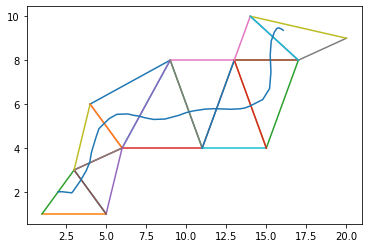

In [22]:
plot_fig(triangle_edges,change_x,change_y)


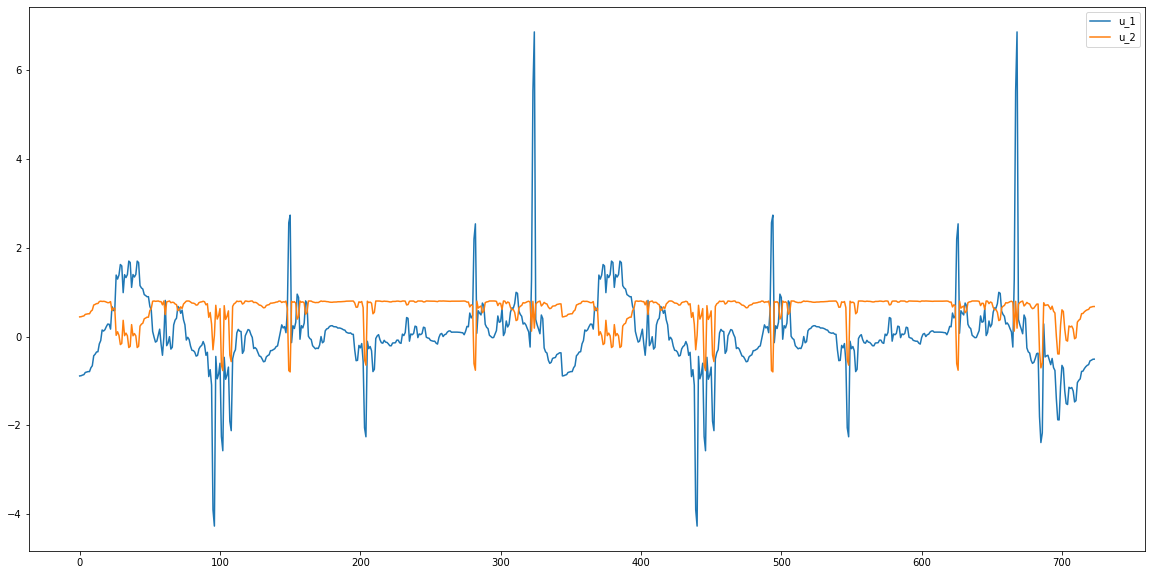

In [23]:

plt.figure(figsize=(20,10))
plt.plot(time, u_matrix_1, label='u_1')
plt.plot(time, u_matrix_2, label='u_2')
plt.legend()
plt.show()

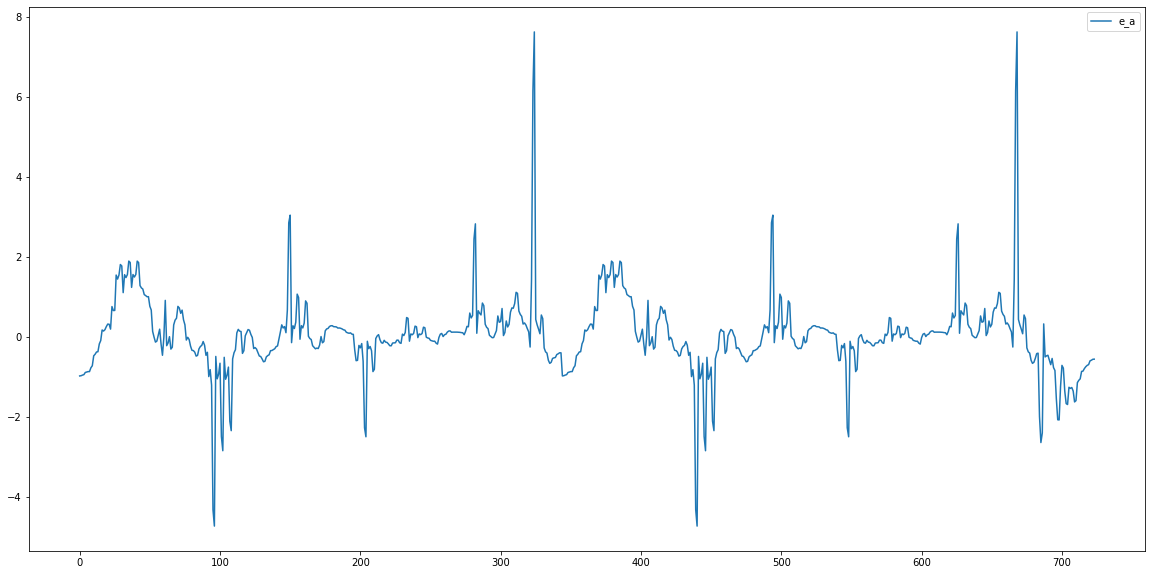

In [24]:
plt.figure(figsize=(20,10))
plt.plot(time, e_a_matrix, label='e_a')
plt.legend()
plt.show()

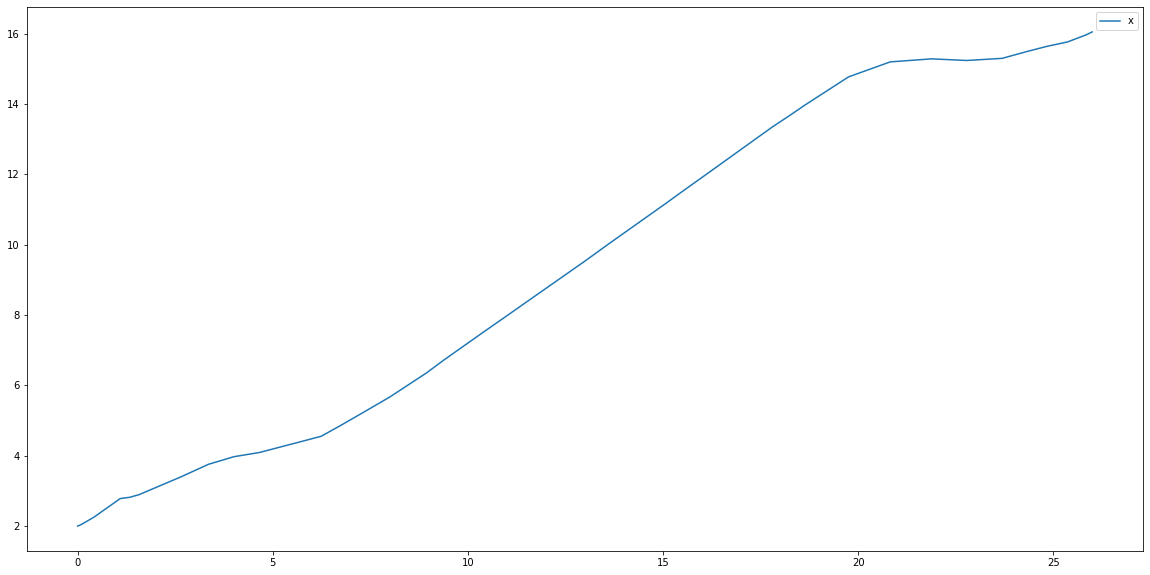

In [25]:
plt.figure(figsize=(20,10))
plt.plot(sol.t, change_x, label='x')
plt.legend()
plt.show()

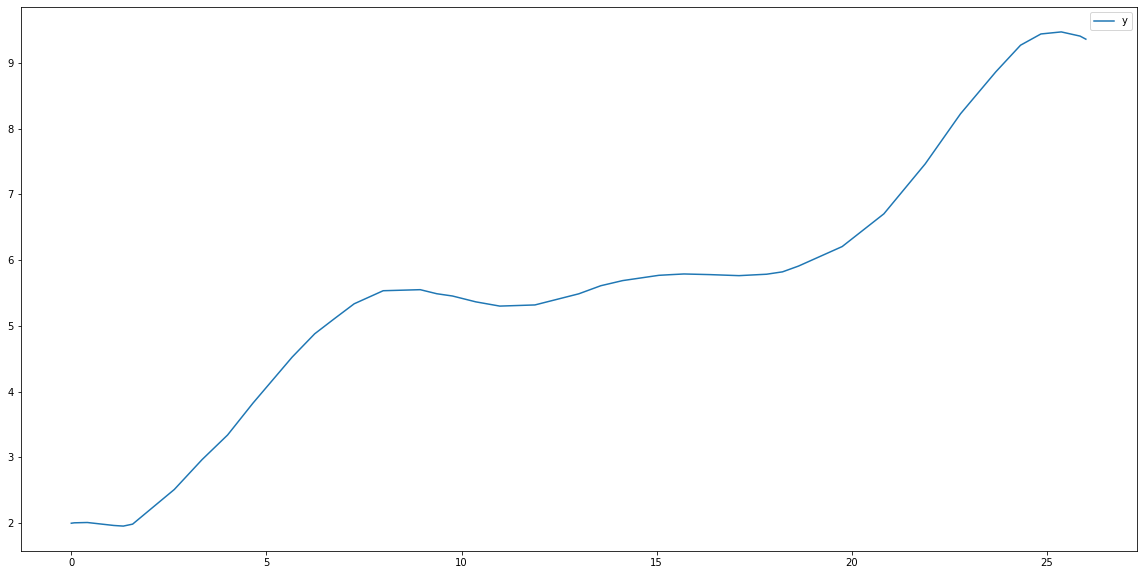

In [26]:
plt.figure(figsize=(20,10))
plt.plot(sol.t, change_y, label='y')
plt.legend()
plt.show()

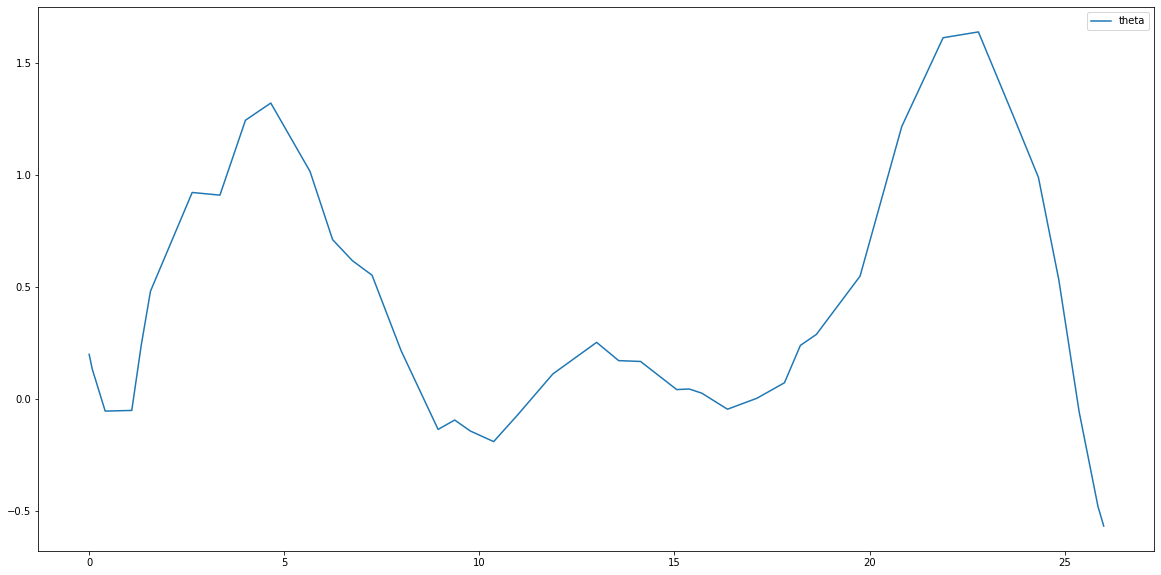

In [27]:
plt.figure(figsize=(20,10))
plt.plot(sol.t, theta_2, label='theta')
plt.legend()
plt.show()

In [ ]:
"""

def kin(t,r):
    theta,x1,y1 = r
    
    pr = [x1,y1]
    
    d1 = round(distance_line(eq_1,pr),4)
    dx = round(distance_line(eq_x,pr),4)
    d2 = round(distance_line(eq_2,pr),4)
   
    w1 = weight_1(d1,d2,dx)
    w2 = weight_2(d1,d2,dx)
    wx = weight_x(d1,d2,dx)    
    
    h = w1* f1 +w2*f2 +wx*fx 
    h1 = lambdify((x,y),h)
    h1x = h1(x1,0)
    h1y = h1(0,y1)
    
    thetaa1 = np.arctan2(h1y,h1x)
    e_a = thetaa1 - theta
    u1 = e_a*0.1
    u2 = 0.9*np.cos(e_a)
    

    u = [u1,u2]
    g = mat([[1,0],[0,np.cos(theta)],[0,np.sin(theta)]])
    q_dot = g @ (mat([u]).T)
    return q_dot[0][0],q_dot[1][0],q_dot[2][0]
"""